In [1]:
PREPROC_TRAIN_DATA = False

In [2]:
import tensorflow as tf
from gradient_accumulator.GAModelWrapper import GAModelWrapper


######### MODEL #########


base_model = tf.keras.applications.ResNet152V2(include_top=True, 
                                                   weights=None, 
                                                input_shape=(360, 256, 2), 
                                                classes=1,
                                                classifier_activation="sigmoid")
inputs = tf.keras.Input(shape=(360, 256, 2))
x = base_model(inputs, training=False)
model = tf.keras.Model(inputs, x)

model = GAModelWrapper(accum_steps=1, inputs=model.input, outputs=model.output)


model.load_weights("model-255.h5")



/home/viktor/.local/lib/python3.10/site-packages/keras/applications/resnet.py:135: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 2 input channels.
  input_shape = imagenet_utils.obtain_input_shape(
2022-12-24 01:59:30.797300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-24 01:59:30.824337: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-24 01:59:30.824526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-24 01:59:30.824954: I tensorflow/core/platform/cpu_feature_guard.cc:193] T

In [3]:
import pandas as pd
if PREPROC_TRAIN_DATA:
    df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed/train-preprocessed.csv")
else:
    df = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed/test-preprocessed.csv")
df

,Unnamed: 0,filename,name,preprocessed_filename
0,0,/media/viktor/T7/gravitational-waves-kaggle-20...,00054c878,/media/viktor/T7/gravitational-waves-kaggle-20...
1,1,/media/viktor/T7/gravitational-waves-kaggle-20...,0007285a3,/media/viktor/T7/gravitational-waves-kaggle-20...
2,2,/media/viktor/T7/gravitational-waves-kaggle-20...,00076c5a6,/media/viktor/T7/gravitational-waves-kaggle-20...
3,3,/media/viktor/T7/gravitational-waves-kaggle-20...,001349290,/media/viktor/T7/gravitational-waves-kaggle-20...
4,4,/media/viktor/T7/gravitational-waves-kaggle-20...,001a52e92,/media/viktor/T7/gravitational-waves-kaggle-20...
...,...,...,...,...
7970,7970,/media/viktor/T7/gravitational-waves-kaggle-20...,ffbce04ef,/media/viktor/T7/gravitational-waves-kaggle-20...
7971,7971,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc2d976b,/media/viktor/T7/gravitational-waves-kaggle-20...
7972,7972,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc905909,/media/viktor/T7/gravitational-waves-kaggle-20...
7973,7973,/media/viktor/T7/gravitational-waves-kaggle-20...,ffe276f3e,/media/viktor/T7/gravitational-waves-kaggle-20...


In [4]:
# Replace "/media/viktor/T7/gravitational-waves-kaggle-2022/train" with "/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed/train" in preprocessed_filename
df["preprocessed_filename"] = df["preprocessed_filename"].apply(lambda x: x.replace("/media/viktor/T7/gravitational-waves-kaggle-2022", "/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed"))

In [5]:
# Loop over the dataset and make predictions: save the predictions to a list and create a column in the dataframe
# with the predictions
import numpy as np
from tqdm import tqdm
predictions = []
for i in tqdm(range(len(df))):
    
    # Get the path to the file
    path = df.iloc[i]["preprocessed_filename"]
    # Load the data
    data = np.load(path)
    # expand the dimensions
    data = np.expand_dims(data, axis=0)
    
    # data = data - np.min(data)
    # data = 2 * (data / np.max(data)  - 0.5)
    
    # Make a prediction
    prediction = model.predict(data, verbose=0)
    # Save the prediction
    predictions.append(prediction[0][0])
    
    if i % 1000 == 0:
        # clear backed memory
        tf.keras.backend.clear_session()
    
df["prediction"] = predictions
df

  0%|          | 0/7975 [00:00<?, ?it/s]2022-12-24 01:59:37.554321: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2022-12-24 01:59:38.327141: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-12-24 01:59:38.327175: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-12-24 01:59:38.443005: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may me

,Unnamed: 0,filename,name,preprocessed_filename,prediction
0,0,/media/viktor/T7/gravitational-waves-kaggle-20...,00054c878,/media/viktor/T7/gravitational-waves-kaggle-20...,0.265322
1,1,/media/viktor/T7/gravitational-waves-kaggle-20...,0007285a3,/media/viktor/T7/gravitational-waves-kaggle-20...,0.256075
2,2,/media/viktor/T7/gravitational-waves-kaggle-20...,00076c5a6,/media/viktor/T7/gravitational-waves-kaggle-20...,0.308277
3,3,/media/viktor/T7/gravitational-waves-kaggle-20...,001349290,/media/viktor/T7/gravitational-waves-kaggle-20...,0.282489
4,4,/media/viktor/T7/gravitational-waves-kaggle-20...,001a52e92,/media/viktor/T7/gravitational-waves-kaggle-20...,0.296986
...,...,...,...,...,...
7970,7970,/media/viktor/T7/gravitational-waves-kaggle-20...,ffbce04ef,/media/viktor/T7/gravitational-waves-kaggle-20...,0.287301
7971,7971,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc2d976b,/media/viktor/T7/gravitational-waves-kaggle-20...,0.291848
7972,7972,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc905909,/media/viktor/T7/gravitational-waves-kaggle-20...,0.302584
7973,7973,/media/viktor/T7/gravitational-waves-kaggle-20...,ffe276f3e,/media/viktor/T7/gravitational-waves-kaggle-20...,0.262906


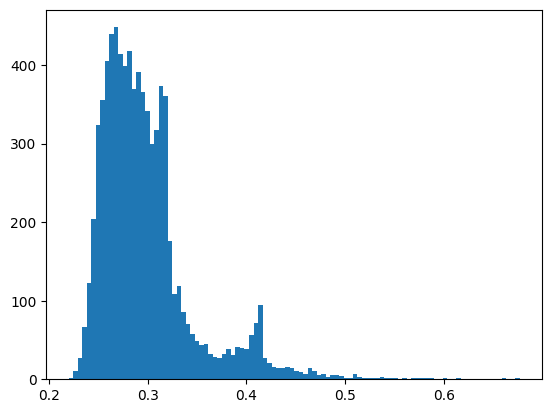

In [6]:
import matplotlib.pyplot as plt
plt.hist(df["prediction"], bins=100);

In [7]:
# calculate auc
from sklearn.metrics import roc_auc_score
if PREPROC_TRAIN_DATA:
    print(roc_auc_score(df["target"], df["prediction"]))

In [8]:
df_sub = df[["name", "prediction"]]
# rename prediction to target
df_sub = df_sub.rename(columns={"prediction": "target",
                                "name": "id"})
df_sub.to_csv("submission.csv", index=False)
df_sub

,id,target
0,00054c878,0.265322
1,0007285a3,0.256075
2,00076c5a6,0.308277
3,001349290,0.282489
4,001a52e92,0.296986
...,...,...
7970,ffbce04ef,0.287301
7971,ffc2d976b,0.291848
7972,ffc905909,0.302584
7973,ffe276f3e,0.262906


In [9]:
if PREPROC_TRAIN_DATA:
    df.to_csv("train_predictions.csv", index=False)
else:
    df.to_csv("test_predictions.csv", index=False)